In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
credit_data = pd.read_csv(r'C:\Users\I0001104\Desktop\Python\Machine Learning\Logistic Regression\credit_data.csv')
credit_data['class'] = credit_data['class']-1
credit_data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_the_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


# #Creation of dummy variables similar to logistic regression preprocessing

In [3]:
dummy_stseca = pd.get_dummies(credit_data['Status_of_existing_checking_account'], prefix = 'status_exs_accnt')
dummy_ch = pd.get_dummies(credit_data['Credit_history'], prefix = 'cred_hist')
dummy_purpose = pd.get_dummies(credit_data['Purpose'],prefix='purpose')
dummy_savacc = pd.get_dummies(credit_data['Savings_Account'],prefix='sav_acc')
dummy_presc = pd.get_dummies(credit_data['Present_Employment_since'],prefix='pre_emp_snc')
dummy_perssx = pd.get_dummies(credit_data['Personal_status_and_sex'],prefix='per_stat_sx')
dummy_othdts = pd.get_dummies(credit_data['Other_debtors'],prefix='oth_debtors')
dummy_property = pd.get_dummies(credit_data['Property'],prefix='property')
dummy_othinstpln = pd.get_dummies(credit_data['Other_installment_plans'],prefix='oth_inst_pln')
dummy_housing = pd.get_dummies(credit_data['Housing'],prefix='housing')
dummy_job = pd.get_dummies(credit_data['Job'], prefix='job')
dummy_telephn = pd.get_dummies(credit_data['Telephone'], prefix = 'telephn')
dummy_forgnwrkr = pd.get_dummies(credit_data['Foreign_worker'],prefix='forgn_wrkr')

In [4]:
continuous_columns = ['Duration_in_month', 'Credit_amount','Installment_rate_in_percentage_of_disposable_income','Present_residence_since','Age_in_years','Number_of_existing_credits_at_the_bank','Number_of_people_being_liable_to_provide_maintenance_for']

In [5]:
for i in credit_data.columns:
    if i not in continuous_columns:
        print(i)

Status_of_existing_checking_account
Credit_history
Purpose
Savings_Account
Present_Employment_since
Personal_status_and_sex
Other_debtors
Property
Other_installment_plans
Housing
Job
Telephone
Foreign_worker
class


In [6]:
credit_continuous = credit_data[continuous_columns]
credit_data_new = pd.concat([dummy_stseca, dummy_ch,dummy_purpose,dummy_savacc,dummy_presc,dummy_perssx,dummy_othdts, dummy_property,dummy_othinstpln,dummy_housing,dummy_job, dummy_telephn, dummy_forgnwrkr,credit_continuous,credit_data['class']],axis=1)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(credit_data_new.drop(['class'],axis=1),credit_data_new['class'],train_size =0.7,random_state=42)

In [8]:
rf_fit = RandomForestClassifier(n_estimators = 1000, criterion="gini", max_depth=100, min_samples_split=3, min_samples_leaf=2)
rf_fit.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [9]:
print("\n Random Forest - Train Confusion Matrix\n\n", pd.crosstab(y_train, rf_fit.predict(x_train), rownames = ["Actual"],colnames = ["Predicted"]))
print ("\n Random Forest - Train accuracy",round(accuracy_score(y_train, rf_fit.predict(x_train)),3))


 Random Forest - Train Confusion Matrix

 Predicted    0    1
Actual             
0          491    0
1           31  178

 Random Forest - Train accuracy 0.956


In [10]:
print("\n Random Forest - Test Confusion Matrix\n\n", pd.crosstab(y_test, rf_fit.predict(x_test), rownames = ["Actual"],colnames = ["Predicted"]))
print ("\n Random Forest - Test accuracy",round(accuracy_score(y_test, rf_fit.predict(x_test)),3))


 Random Forest - Test Confusion Matrix

 Predicted    0   1
Actual            
0          197  12
1           57  34

 Random Forest - Test accuracy 0.77


# #Grid Search on random forest

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [12]:
pipeline = Pipeline([('clf', RandomForestClassifier(criterion='gini'))])
parameters = {'clf__n_estimators':(1000,2000,3000),'clf__max_depth':(100,200,300),'clf__min_samples_split':(2,3),'clf__min_samples_leaf':(1,2)}

In [13]:
grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1, cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__n_estimators': (1000, 2000, 3000), 'clf__max_depth': (100, 200, 300), 'clf__min_samples_split': (2, 3), 'clf__min_samples_leaf': (1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [14]:
print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Best Training score: 0.773
Best parameters set:
	clf__max_depth: 300
	clf__min_samples_leaf: 2
	clf__min_samples_split: 2
	clf__n_estimators: 3000


In [15]:
predictions = grid_search.predict(x_test)
print ("Testing accuracy:",round(accuracy_score(y_test,predictions),4))
print ("\nComplete report of Testingdata\n",classification_report(y_test, predictions))
print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n",pd.crosstab(y_test, predictions,rownames = ["Actuall"],colnames =["Predicted"]))

Testing accuracy: 0.7633

Complete report of Testingdata
              precision    recall  f1-score   support

          0       0.77      0.95      0.85       209
          1       0.74      0.34      0.47        91

avg / total       0.76      0.76      0.73       300



Random Forest Grid Search- Test Confusion Matrix

 Predicted    0   1
Actuall           
0          198  11
1           60  31


# #Variable Importance Plot


Feature ranking:

Feature 55 , Credit_amount 0.1003
Feature 58 , Age_in_years 0.0812
Feature 54 , Duration_in_month 0.0752
Feature 3 , status_exs_accnt_A14 0.0483
Feature 0 , status_exs_accnt_A11 0.0372
Feature 56 , Installment_rate_in_percentage_of_disposable_income 0.0351
Feature 57 , Present_residence_since 0.0316
Feature 8 , cred_hist_A34 0.0261
Feature 9 , purpose_A40 0.0214
Feature 19 , sav_acc_A61 0.0189
Feature 59 , Number_of_existing_credits_at_the_bank 0.0189
Feature 1 , status_exs_accnt_A12 0.0177
Feature 44 , housing_A152 0.0157
Feature 36 , property_A121 0.0153
Feature 25 , pre_emp_snc_A72 0.015
Feature 4 , cred_hist_A30 0.0148
Feature 6 , cred_hist_A32 0.0148
Feature 13 , purpose_A43 0.0146
Feature 38 , property_A123 0.0145
Feature 30 , per_stat_sx_A92 0.0143
Feature 26 , pre_emp_snc_A73 0.0143
Feature 42 , oth_inst_pln_A143 0.014
Feature 31 , per_stat_sx_A93 0.0138
Feature 48 , job_A173 0.0134
Feature 51 , telephn_A192 0.0134
Feature 50 , telephn_A191 0.0133
Feature 39 

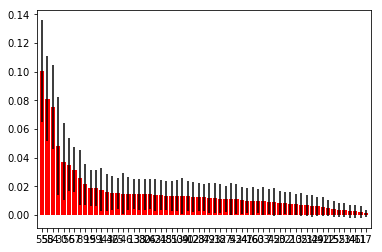

In [16]:
import matplotlib.pyplot as plt
import numpy as np

rf_fit = RandomForestClassifier(n_estimators=1000, criterion="gini",max_depth=300, min_samples_split=3,min_samples_leaf=1)
rf_fit.fit(x_train,y_train)
importances = rf_fit.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_fit.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

colnames = list(x_train.columns)
# Print the feature ranking
print("\nFeature ranking:\n")
for f in range(x_train.shape[1]):
    print ("Feature", indices[f], ",", colnames[indices[f]],round(importances [indices[f]],4))

plt.figure()
plt.bar(range(x_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()